In [6]:
#imports
import pandas as pd
import numpy as np
import random
import math
#target protein sequence
e = '''MLRREARLRREYLYRKAREEAQRSAQERKERLRRALEENRLIPTELRREALALQGSLEFD
DAGGEGVTSHVDDEYRWAGVEDPKVMITTSRDPSSRLKMFAKELKLVFPGAQRMNRGRHE
VGALVRACKANGVTDLLVVHEHRGTPVGLIVSHLPFGPTAYFTLCNVVMRHDIPDLGTMS
EAKPHLITHGFSSRLGKRVSDILRYLFPVPKDDSHRVITFANQDDYISFRHHVYKKTDHR
NVELTEVGPRFELKLYMIRLGTLEQEATADVEWRWHPYTNTARKRVFLSTE'''

In [7]:
#read csv of filtered MHC peptides/t-cell epitopes
peps = pd.read_csv("/Users/kbhaskar/Desktop/GEO database/overlap (2).csv")

In [8]:
#list for epitope clustering analysis
cluster = []

In [9]:
from fuzzywuzzy import fuzz
total = 0
#list that contains peptides from the dataset
lists = []
for index, row in peps.iterrows():
    lists.append(row["peptide"])
for x in lists:
    #count how many epitopes from the dataset are in the proteins sequence. A partial ratio is allowed in the case where the sequence is mostly but not completely similar. 
    if x in e:
        total+=1
        #find the position of the found epitope in the protein sequence and append to the cluster list. 
        clus = e.find(x)
        cluster.append(clus)
print(total)

23


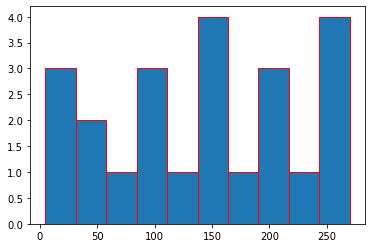

In [10]:
#plot frequency of clusters - locations of the protein where there are a lot of clusters have immunogenic potential
import matplotlib.pyplot as plt
plt.hist(cluster, edgecolor="red", bins=10)
plt.show()

In [11]:
print(cluster)

[98, 185, 268, 141, 153, 270, 69, 146, 5, 19, 228, 88, 44, 106, 6, 38, 195, 248, 248, 209, 155, 200, 130]


In [53]:
#create 100 pseudo proteins for comparison - as a control
bigList = []
random.seed(4)
total = 0;
for count in range (0,100):
    word = ""
    for count in range (0,295):
        word = word + random.choice(['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'])
    bigList.append(word)
    



In [75]:
#same analysis as before, count how many epitopes found in all pseudo proteins and average them
total = 0
for i in bigList:
    for f in lists:
        if fuzz.partial_ratio(i,f) >= 95:
            total+=1


avg = total/100

In [76]:
print(avg)

0
